# Comparison of C6F14 and Water systems

## 1 Density Comparison

In [36]:
def density(psf, dcd, segid, resname):
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import numpy as np
    
    u = MDAnalysis.Universe(psf, dcd)
    c6f = u.select_atoms(segid)
    D = density_from_Universe(u, delta=0.25, atomselection=resname, start=2400, stop =2500)
    D.convert_density(unit='water')
    Dxz = np.sum(D.grid, axis=1)
    Dx = np.sum(Dxz, axis=1)
    Dz = np.sum(Dxz, axis=0)
    Dyz = np.sum(D.grid, axis=0)
    Dy = np.sum(Dyz, axis=1)
    x = np.linspace(1,np.size(Dx),np.size(Dx))
    y = np.linspace(1,np.size(Dy),np.size(Dy))
    z = np.linspace(1,np.size(Dz),np.size(Dz))
    
    return x, Dx, y, Dy, z, Dz

In [59]:
c6f_segid = "segid C6F"
wat_segid = "segid TIP"

c6f_resname = "resname C6F"
wat_resname = "resname TIP3"

c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4/'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4/'

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.05)
ymajorLocator = MultipleLocator(0.2)
yminorLocator = MultipleLocator(0.1)

conv_factor = 40. # converting number of bin to nm (each bin is 0.5 Amstrongs)

wat_dens = 1000.
c6f_dens = 1691. #https://pubchem.ncbi.nlm.nih.gov/compound/9639#section=Density

#Convert  density{per g/cm^3} to density{kg/m^-3}.

wat_norm = wat_dens/1000.  
c6f_norm = c6f_dens/1000.

def plot_Sdensity(axis, sw):
    plt.clf()
    win = signal.hann(sw)
    
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    
    for T in 200, 225, 275, 350, 450, 600:
        index =3
        P = 1
        dQ = 0.003
        folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
        
        psf_wat = wat_path+folder+'/inputFiles/waterGnc.psf'
        dcd_wat = wat_path+folder+'/outputFiles/waterGnc.dcd'
        
        x, Dx, y, Dy, z, Dz = density(psf_wat, dcd_wat, wat_segid, wat_resname)
        Dx = signal.convolve(Dx, win, mode='same') / sum(win)      
        Dy = signal.convolve(Dy, win, mode='same') / sum(win)      
        Dz = signal.convolve(Dz, win, mode='same') / sum(win)      
        wat_norm = np.mean(Dz[50:110])
        
        if (axis == "x"):
            axs[0].plot(x/conv_factor, Dx/wat_norm, label="T=%d"%(T))
            #axs[0].legend()
        elif (axis == "y"):
            axs[0].plot(y/conv_factor, Dy/wat_norm, label="T=%d"%(T))
            #axs[0].legend()
        else:
            axs[0].plot(z/conv_factor, Dz/wat_norm, label="T=%d"%(T))
            #axs[0].legend()
        axs[0].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[0].set_xlabel("z (nm)")
        axs[0].set_ylabel(r"$\rho/\rho\star$")
        axs[0].set_ylim(0, 1.75)
        axs[0].text(0.1, 1.8, '(a)')
        
        
        psf_c6f = c6f_path+folder+'/inputFiles/c6fGra.psf'
        dcd_c6f = c6f_path+folder+'/outputFiles/c6fGra.dcd'
                        
        x, Dx, y, Dy, z, Dz = density(psf_c6f, dcd_c6f, c6f_segid, c6f_resname)
        Dx = signal.convolve(Dx, win, mode='same') / sum(win)      
        Dy = signal.convolve(Dy, win, mode='same') / sum(win)      
        Dz = signal.convolve(Dz, win, mode='same') / sum(win)      
        c6f_norm = np.mean(Dz)
        
        if (axis == "x"):
            axs[1].plot(x/conv_factor, Dx/c6f_norm, label="T=%d"%(T))
            #axs[1].legend()
        elif (axis == "y"):
            axs[1].plot(y/conv_factor, Dy/c6f_norm, label="T=%d"%(T))
            #axs[1].legend()
        else:
            axs[1].plot(z/conv_factor, Dz/c6f_norm, label="T=%d"%(T))
            #axs[1].legend()
        axs[1].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[1].set_xlabel("z (nm)")
        axs[1].set_ylabel(r"$\rho/\rho\star$")
        axs[1].set_ylim(0, 1.75)
        axs[1].text(0.0, 1.8, '(b)')
    
    plt.tight_layout(pad=1.2, w_pad=0.5, h_pad=1.0)
    plt.savefig("./RESULTS/density.pdf")
    plt.show()

<Figure size 432x288 with 0 Axes>

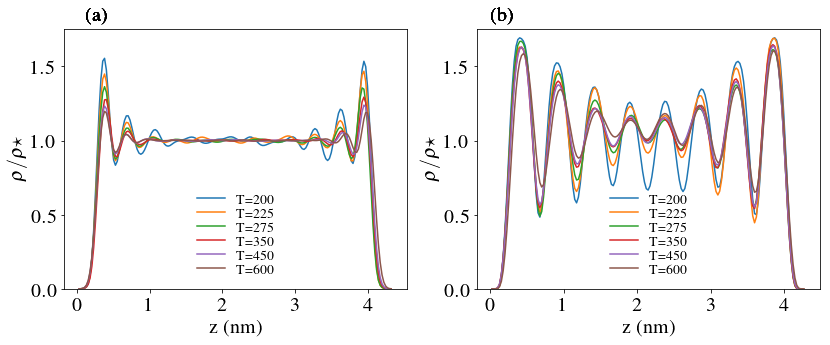

In [60]:
for i in [15]:
    plot_Sdensity("z", i)

## 1.1 Peak of first hydration layer

In [330]:
c6f_segid = "segid C6F"
wat_segid = "segid TIP"

c6f_resname = "resname C6F"
wat_resname = "resname TIP3"

c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4/'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4/'

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import peakutils
from peakutils.plot import plot as pplot
from scipy.optimize import curve_fit

from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.05)
ymajorLocator = MultipleLocator(0.2)
yminorLocator = MultipleLocator(0.1)

conv_factor = 20. # converting number of bin to nm (each bin is 0.5 Amstrongs)

wat_dens = 1000.
c6f_dens = 1691. #https://pubchem.ncbi.nlm.nih.gov/compound/9639#section=Density

#Convert  density{per g/cm^3} to density{kg/m^-3}.

wat_norm = wat_dens/1000.  
c6f_norm = c6f_dens/1000.

def plot_density_peaks(axis, sw):
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(8,5))
    win = signal.hann(sw)
    
    wat_peaks = []
    c6f_peaks = []
    Temp = np.array([200, 225, 275, 350, 450, 600])
    for T in Temp:
        index =3
        P = 1
        dQ = 0.003
        folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
        
        psf_wat = wat_path+folder+'/inputFiles/waterGnc.psf'
        dcd_wat = wat_path+folder+'/outputFiles/waterGnc.dcd'
        
        x, Dx, y, Dy, z, Dz = density(psf_wat, dcd_wat, wat_segid, wat_resname)
        wat_norm = np.mean(Dz)
        Dx = signal.convolve(Dx, win, mode='same') / sum(win)      
        Dy = signal.convolve(Dy, win, mode='same') / sum(win)      
        Dz = signal.convolve(Dz, win, mode='same') / sum(win)      
        Dz /= wat_norm
        peak = peakutils.indexes(Dz, thres=0.9, min_dist=40)
        wat_peaks.append(Dz[peak])
#         pplot(z, Dz, peak)
                
        psf_c6f = c6f_path+folder+'/inputFiles/c6fGra.psf'
        dcd_c6f = c6f_path+folder+'/outputFiles/c6fGra.dcd'
                        
        x, Dx, y, Dy, z, Dz = density(psf_c6f, dcd_c6f, c6f_segid, c6f_resname)
        c6f_norm = np.mean(Dz)
        Dx = signal.convolve(Dx, win, mode='same') / sum(win)      
        Dy = signal.convolve(Dy, win, mode='same') / sum(win)      
        Dz = signal.convolve(Dz, win, mode='same') / sum(win)
        Dz /= c6f_norm
        peak = peakutils.indexes(Dz, thres=0.9, min_dist=40)
        c6f_peaks.append(Dz[peak])
#         pplot(z, Dz, peak)
    wat_peaks = np.asarray(wat_peaks, dtype=np.float64)
    c6f_peaks = np.asarray(c6f_peaks, dtype=np.float64)
    wat_peaks_mean = np.mean(wat_peaks, axis=1)
    c6f_peaks_mean = np.mean(c6f_peaks, axis=1)
    wat_peaks_sd = np.std(wat_peaks, axis=1)
    c6f_peaks_sd = np.std(c6f_peaks, axis=1)
    
    #Polynomial fit
    coeffs_wat = np.polyfit(Temp, wat_peaks_mean, 2)
    f_x_wat = np.poly1d(coeffs_wat)
    
    coeffs_c6f = np.polyfit(Temp, c6f_peaks_mean, 2)
    f_x_c6f = np.poly1d(coeffs_c6f)
    
    #Exponential fit
#     def func(x, a1, a2, b1, b2, c):
#         #return a1 * np.exp(-b1 * x) + a2 * np.exp(-b2 * x) + c
#         return  c + a/(x+b)
    
#     popt_wat, pcov_wat = curve_fit(func, Temp, wat_peaks_mean)
#     popt_c6f, pcov_c6f = curve_fit(func, Temp, c6f_peaks_mean)
    
    #Polynomial plot
    axs.errorbar(Temp, wat_peaks_mean, yerr=wat_peaks_sd, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='g', ecolor='g',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x_wat(Temp), '--', color='g', label='water')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    axs.set_xlabel('T (K)')
    axs.set_ylabel(r'${(\rho/\rho\star)}_{max}$')
    
    axs.errorbar(Temp, c6f_peaks_mean, yerr=c6f_peaks_sd, fmt='s', markersize='10', markerfacecolor='w' ,markeredgecolor='r', ecolor='r',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x_c6f(Temp), '--', color='r', label='c6f14')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    axs.set_xlabel('T (K)')
    axs.set_ylabel(r'${(\rho/\rho\star)}_{max}$')
    
    #Exponential plot
#     axs.errorbar(Temp, wat_peaks_mean, yerr=wat_peaks_sd, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='g', ecolor='g',capsize=4, elinewidth=2)
#     axs.plot(Temp, func(Temp, *popt_wat), '--', color='g', label='water')
#     axs.legend(frameon=False, labelspacing=0, prop={'size':14})
#     axs.set_xlabel('T (K)')
#     axs.set_ylabel(r'${(\rho/\rho\star)}_{max}$')
    
#     axs.errorbar(Temp, c6f_peaks_mean, yerr=c6f_peaks_sd, fmt='s', markersize='10', markerfacecolor='w' ,markeredgecolor='r', ecolor='r',capsize=4, elinewidth=2)
#     axs.plot(Temp, func(Temp, *popt_c6f), '--', color='r', label='c6f14')
#     axs.legend(frameon=False, labelspacing=0, prop={'size':14})
#     axs.set_xlabel('T (K)')
#     axs.set_ylabel(r'${(\rho/\rho\star)}_{max}$')
    
    plt.savefig('./RESULTS/densityPeak.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

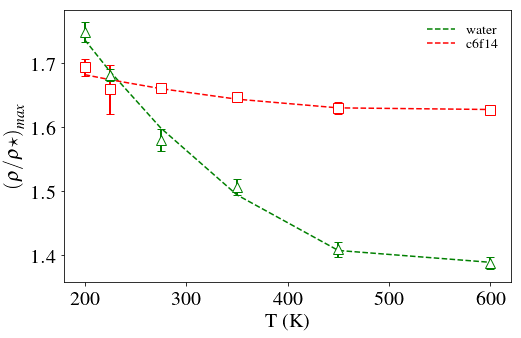

In [331]:
plot_density_peaks("z", 7)

## 2.Density of States

In [67]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

def plot_dos():
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))    
    wat_case = 'watL'
    c6f_case = 'pfL'
    
    for T in 200, 225, 275, 350, 450, 600:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_DOS_"+wat_case+".dat"
        path=wat_path+'/analysisBase_dos/'+fname
        DOS = np.loadtxt(path)
        norm = np.max(DOS)
        freq = np.loadtxt(wat_path+"/analysisBase_dos/freq.dat")

        axs[0].plot(freq, DOS/norm, label="T=%d"%(T))
        axs[0].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[0].set_xlabel("$f$ (THz)")
        axs[0].set_ylabel("VDOS")
        axs[0].set_ylim(0, 1.05)
        axs[0].text(0.0, 1.08, '(a)')
        sub_axes = plt.axes([0.25, 0.55, 0.1, 0.25])
        sub_axes.plot(freq[np.where(np.logical_and(freq>59, freq<62))], DOS[np.where(np.logical_and(freq>59, freq<62))]/norm)
        
    for T in 200, 225, 275, 350, 450, 600:
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_DOS_"+c6f_case+".dat"
        path=c6f_path+'/analysisBase_dos/'+fname
        DOS = np.loadtxt(path)
        norm = np.max(DOS)
        freq = np.loadtxt(c6f_path+"/analysisBase_dos/freq.dat")

        axs[1].plot(freq, DOS/norm, label="T=%d"%(T))
        axs[1].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[1].set_xlabel("$f$ (THz)")
        axs[1].set_ylabel("VDOS")
        axs[1].set_ylim(0, 1.05)
        axs[1].text(0.0, 1.08, '(b)')
        
    plt.tight_layout(pad=1.2, w_pad=0.5, h_pad=1.0)
    plt.savefig("./RESULTS/dos.pdf")
    plt.show()

<Figure size 432x288 with 0 Axes>

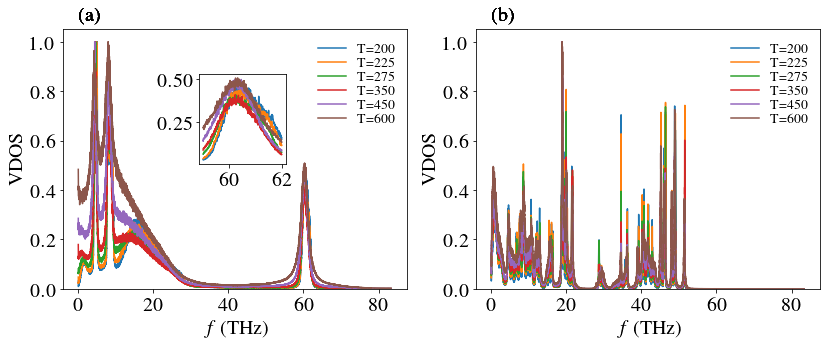

In [68]:
plot_dos()

### 2.1 Difference in vibrational densities with temperature

In [255]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

def plot_Fpoly():
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(8,5))    
    wat_case = 'watL'
    c6f_case = 'pfL'
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    f = np.zeros((np.size(Temp), np.size(index)))
    
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+wat_case+".dat"
            path=wat_path+'/analysisBase_dos/'+fname
            DOS = np.loadtxt(path)
            freq = np.loadtxt(wat_path+"/analysisBase_dos/freq.dat")
            f[j, k] = np.trapz(DOS[:,1],freq)
            k+=1
        j+=1
        
    f_avg = np.mean(f, axis=1)
    f_std = np.std(f, axis=1)
    coeffs = np.polyfit(Temp, f_avg, 1)
    f_x = np.poly1d(coeffs)
    #plt.plot(Temp, f_avg, '^', label="Overlap")
    
    axs.errorbar(Temp, f_avg, yerr=f_std, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='g', ecolor='g',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x(Temp), '--', color='g', label = 'water')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+c6f_case+".dat"
            path=c6f_path+'/analysisBase_dos/'+fname
            DOS = np.loadtxt(path)
            freq = np.loadtxt(c6f_path+"/analysisBase_dos/freq.dat")
            f[j, k] = np.trapz(DOS[:,1],freq)
            k+=1
        j+=1
        
    f_avg = np.mean(f, axis=1)
    f_std = np.std(f, axis=1)
    coeffs = np.polyfit(Temp, f_avg, 1)
    f_x = np.poly1d(coeffs)
    #plt.plot(Temp, f_avg, '^', label="Overlap")
    
    axs.errorbar(Temp, f_avg, yerr=f_std, fmt='s', markersize='10', markerfacecolor='w' ,markeredgecolor='r', ecolor='r',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x(Temp), '--', color='r', label='c6f14')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    axs.set_xlabel('T (K)')
    axs.set_ylabel(r'$\int_A \mathrm{VDOS}$')
    plt.savefig('./RESULTS/dosArea.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

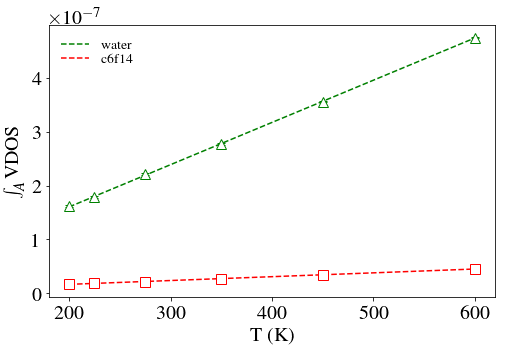

In [256]:
plot_Fpoly()

### 2.2 Difference in vibrational densities comparing bulk and interface. 

In [257]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

def plot_Spoly():
    plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(8,5))    
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    S = np.zeros((np.size(Temp), np.size(index)))
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            f = np.zeros(2)
            i=0
            for case in "watL", "watB":
                P = 1
                dQ = 0.003
                fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+case+".dat"
                path=wat_path+'/analysisBase_dos/'+fname
                DOS = np.loadtxt(path)
                freq = np.loadtxt(wat_path+"/analysisBase_dos/freq.dat")
                f[i] = np.trapz(DOS[:,1],freq)
                i+=1        
            S[j, k] = f[1]-f[0]
            k+=1
        j+=1
    S_avg = np.mean(S, axis=1)
    S_std = np.std(S, axis=1)
    coeffs = np.polyfit(Temp, S_avg, 1)
    f_x = np.poly1d(coeffs)
    #plt.plot(Temp, S_avg, '^', label="Overlap")
    axs.errorbar(Temp, S_avg, yerr=S_std, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='g', ecolor='g',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x(Temp), '--', color='g', label='water')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            f = np.zeros(2)
            i=0
            for case in "pfL", "pfB":
                P = 1
                dQ = 0.003
                fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+case+".dat"
                path=c6f_path+'/analysisBase_dos/'+fname
                DOS = np.loadtxt(path)
                freq = np.loadtxt(c6f_path+"/analysisBase_dos/freq.dat")
                f[i] = np.trapz(DOS[:,1],freq)
                i+=1        
            S[j, k] = f[1]-f[0]
            k+=1
        j+=1
    S_avg = np.mean(S, axis=1)
    S_std = np.std(S, axis=1)
    coeffs = np.polyfit(Temp, S_avg, 1)
    f_x = np.poly1d(coeffs)
    #plt.plot(Temp, S_avg, '^', label="Overlap")
    axs.errorbar(Temp, S_avg, yerr=S_std, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='r', ecolor='r',capsize=4, elinewidth=2)
    axs.plot(Temp, f_x(Temp), '--', color='r', label='c6f14')
    axs.legend(frameon=False, labelspacing=0, prop={'size':14})
    axs.set_xlabel('T (K)')
    axs.set_ylabel(r'$\int_A \mathrm{VDOS}_{B} - \int_A \mathrm{VDOS}_{I}$')
    plt.savefig('./RESULTS/dosAreaReduction.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

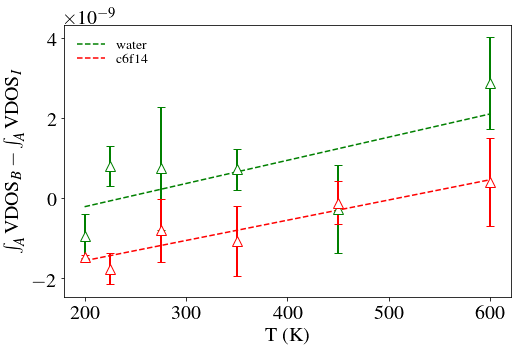

In [258]:
plot_Spoly()

## 3.Spectral heat flux

In [71]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

def plot_shc():
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(12,5)) 
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path=wat_path+'/analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        norm = 55000.0
        axs[0].plot(freq, SHC/norm, label="T=%d"%(T))
        axs[0].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[0].set_xlabel(r'$f $(THz)')
        axs[0].set_ylabel(r'Normalized $q(\omega)$')
        axs[0].set_ylim(0, 1.05)
        axs[0].text(0.0, 1.08, '(a)')
        
        Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path=c6f_path+'/analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        norm = 2.4e14
        axs[1].plot(freq, SHC/norm, label="T=%d"%(T))
        axs[1].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[1].set_xlabel(r'$f $(THz)')
        axs[1].set_ylabel(r'Normalized $q(\omega)$')
        axs[1].set_ylim(0, 1.05)
        axs[1].text(0.0, 1.08, '(b)')
    plt.tight_layout(pad=1.2, w_pad=0.5, h_pad=0.0)
    plt.savefig('./RESULTS/shc.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

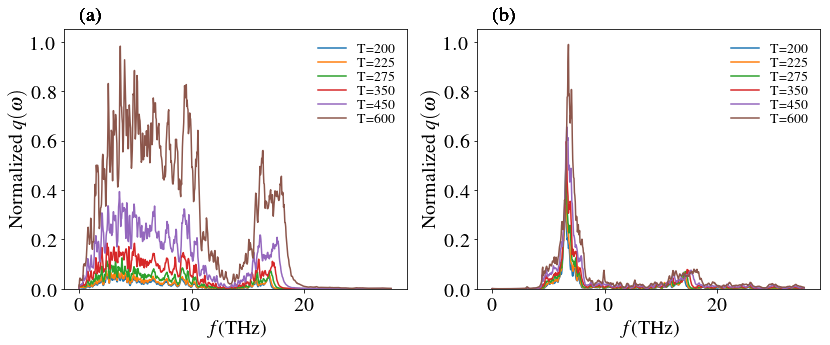

In [72]:
plot_shc()

## 3.1 Acuumulated heat current

In [83]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

def plot_shcAcc():
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(12,5)) 
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path=wat_path+'/analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        Q = np.cumsum(SHC)
        norm = 1.1e7
        axs[0].plot(freq, Q/norm, label="T=%d"%(T))
        axs[0].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[0].set_xlabel(r'$f $(THz)')
        axs[0].set_ylabel(r'Normalized $ q(\omega)$ accu.')
        axs[0].set_ylim(0, 1.05)
        axs[0].text(0.0, 1.08, '(a)')
        
        Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path=c6f_path+'/analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        Q = np.cumsum(SHC)
        norm = 0.9e16
        axs[1].plot(freq, Q/norm, label="T=%d"%(T))
        axs[1].legend(frameon=False, labelspacing=0, prop={'size':14})
        axs[1].set_xlabel(r'$f $(THz)')
        axs[1].set_ylabel(r'Normalized $ q(\omega)$ accu.')
        axs[1].set_ylim(0, 1.05)
        axs[1].text(0.0, 1.08, '(b)')
        
    plt.tight_layout(pad=1.2, w_pad=0.5, h_pad=0.0)
    plt.savefig('./RESULTS/shcAcc.pdf')    
    plt.show()

<Figure size 432x288 with 0 Axes>

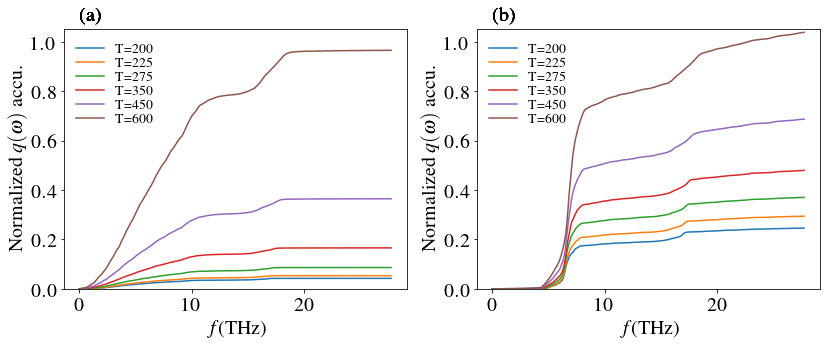

In [84]:
plot_shcAcc()

## 3.2 Heat current vs Temperature

In [91]:
c6f_path = './GRA_C6F14_TEMP/simulationOutput_S4'
wat_path = './GRA_WAT_TEMP/simulaionOutput_S4'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Times'], 'size':'20'})
#rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'17'})
rc('text', usetex=True)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorFormatter = FormatStrFormatter('%d')
ymajorLocator = MultipleLocator(0.25)
yminorLocator = MultipleLocator(0.1)

def plot_fluxVtemp():
    plt.clf()
    fig, axs = plt.subplots(2, 1, figsize=(7,6), sharex=True) 
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    Q_tot = np.zeros((np.size(Temp),np.size(index)))
    
    
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_hf.dat"
            path=wat_path+'/analysisBase_hf/'+fname
            data = np.loadtxt(path)
            freq = data[:,0]
            SHC = data[:,1]
            Q_tot[i, j] = np.sum(SHC, dtype=float)
            j+=1
        i+=1
    norm = 1.0e7
    Q_tot /= norm
    Q_avg = np.mean(Q_tot, axis=1)
    Q_std = np.std(Q_tot, axis=1)
    
    coeffs = np.polyfit(Temp, Q_avg, 2)
    f_x = np.poly1d(coeffs)
    
#     def func(x, a, b, c):
#        return a * np.exp(-b * x) + c
#         return  c + a/(x+b)   
#     popt, pcov = curve_fit(func, Temp, Q_avg)
#     plt.plot(Temp, func(Temp, *popt), '--', label='optimal', color='r')

    axs[0].errorbar(Temp, Q_avg, yerr=Q_std, fmt='o', markersize=10, markerfacecolor='g', markeredgecolor='g', ecolor='g', elinewidth=2, capsize=4, label="water")
    axs[0].plot(Temp, f_x(Temp), '--', color='green')
    axs[0].legend(frameon=False, labelspacing=0, prop={'size':14})
    axs[0].set_ylabel(r'Normalized $\int_\omega q(\omega)$')
    axs[0].tick_params(axis ='x', which='both', bottom=False, labelbottom=False)
    axs[0].yaxis.set_major_locator(ymajorLocator)
    axs[0].yaxis.set_minor_locator(yminorLocator)
    axs[0].set_ylim(0, 1.25)
    axs[0].text(Temp.max(), 1.3, '(a)')
    
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_hf.dat"
            path=c6f_path+'/analysisBase_hf/'+fname
            data = np.loadtxt(path)
            freq = data[:,0]
            SHC = data[:,1]
            Q_tot[i, j] = np.sum(SHC, dtype=float)
            j+=1
        i+=1
    norm = 0.9e16
    Q_tot /= norm
    Q_avg = np.mean(Q_tot, axis=1)
    Q_std = np.std(Q_tot, axis=1)
    
    coeffs = np.polyfit(Temp, Q_avg, 1)
    f_x = np.poly1d(coeffs)
    
#     def func(x, a, b, c):
#        return a * np.exp(-b * x) + c
#         return  c + a/(x+b)   
#     popt, pcov = curve_fit(func, Temp, Q_avg)
#     plt.plot(Temp, func(Temp, *popt), '--', label='optimal', color='r')

    axs[1].errorbar(Temp, Q_avg, yerr=Q_std, fmt='s', markersize=10, markerfacecolor='r', markeredgecolor='r', ecolor='r', elinewidth=2, capsize=4, label="c6f14")
    axs[1].plot(Temp, f_x(Temp), '--', color='red')
    axs[1].legend(frameon=False, labelspacing=0, prop={'size':14})
    axs[1].set_xlabel('T (K)')
    axs[1].set_ylabel(r'Normalized $\int_\omega q(\omega)$')
    axs[1].yaxis.set_major_locator(ymajorLocator)
    axs[1].yaxis.set_minor_locator(yminorLocator)
    axs[1].set_ylim(0, 1.25)
    axs[1].text(Temp.max(), 1.3, '(b)')
    
    plt.tight_layout(pad=1.2, w_pad=0.0, h_pad=1.0)
    plt.savefig('./RESULTS/shcSum.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

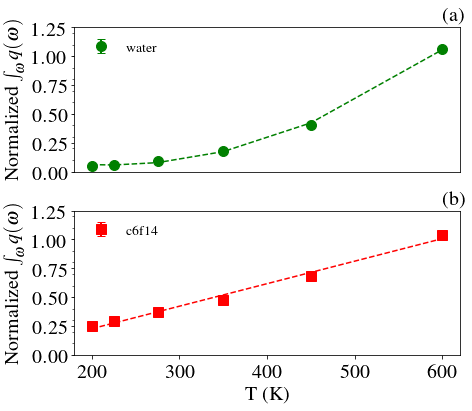

In [92]:
plot_fluxVtemp()